In [1]:
import numpy as np  
import pandas as pd 
import math

In [2]:
dataset = pd.read_csv("../../crimesInChicagoData/dataset.csv")

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


from sklearn import decomposition
from sklearn import datasets

In [3]:
%matplotlib inline

### Deleting Unnecessary Columns 
* The goal of this file is to delete unnecessary columns in order to select the ones that we will unnest for a binary representation 

In [3]:
dataset = dataset.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)

In [23]:
dataset.head()

,ID,Date,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude
0,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,False,False,4.0,2004.0,41.734106,-87.563621
1,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,False,True,9.0,2003.0,41.817229,-87.637328
2,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,False,False,14.0,2004.0,41.915620,-87.694019
3,4789765,2004-12-30 20:00:00,THEFT,OTHER,False,False,25.0,2004.0,41.919054,-87.752178
4,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,False,False,22.0,2003.0,41.691785,-87.635116


### Changing Categorical --> Binary Data
* Done for 'Arrest' & 'Domestic' columns

In [30]:
dataset['Arrest'] = dataset['Arrest'].map({True:1, False:0})
dataset['Arrest'].head()

0    0
1    0
2    0
3    0
4    0
Name: Arrest, dtype: int64

In [31]:
dataset['Domestic'] = dataset['Domestic'].map({True:1, False:0})
dataset['Domestic'].head()

0    0
1    1
2    0
3    0
4    0
Name: Domestic, dtype: int64

#### Reasoning for deleting columns
* The column of 'Description' is not necessary because we do not need such fine grain info -- a lot of the information is summarized in primary types and it has 376 dimensions, which is unnecessary and too many for our case 
* The column of 'FBI Code' is not necessary because all we care about is the nature of the crime which is descrimed in the 'Primary Type' column
* 'IUCR' is not necessary for the same reason as above 

In [ ]:
dataset = dataset.drop(['IUCR', 'Description', 'FBI Code'], axis = 1)

dataset.head()

In [33]:
dataset.to_csv("../../crimesInChicagoData/condensedData.csv")

### Using More Condensed Data

In [12]:
dataset =  pd.read_csv("../../crimesInChicagoData/condensedData.csv")

In [13]:
dataset

,Unnamed: 0,ID,Date,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude
0,0,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,0,0,4.0,2004.0,41.734106,-87.563621
1,1,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,0,1,9.0,2003.0,41.817229,-87.637328
2,2,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,0,0,14.0,2004.0,41.915620,-87.694019
3,3,4789765,2004-12-30 20:00:00,THEFT,OTHER,0,0,25.0,2004.0,41.919054,-87.752178
4,4,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,0,0,22.0,2003.0,41.691785,-87.635116
5,5,4838048,2004-08-01 00:01:00,THEFT,APARTMENT,0,0,10.0,2004.0,41.853447,-87.712625
6,6,4791194,2001-01-01 11:00:00,CRIM SEXUAL ASSAULT,RESIDENCE,1,1,5.0,2001.0,41.687020,-87.608445
7,7,4679521,2003-03-15 00:00:00,OTHER OFFENSE,RESIDENCE PORCH/HALLWAY,0,0,22.0,2003.0,41.729712,-87.653159
8,8,4792195,2004-09-16 10:00:00,THEFT,RESIDENCE,0,0,18.0,2004.0,41.902862,-87.636098
9,9,4680124,2003-01-01 00:00:00,THEFT,RESIDENCE,0,0,11.0,2003.0,41.869772,-87.708180


In [20]:
len(dataset.loc[(dataset['Year'] == 2004) & (dataset['District'] == 4.0)])

21495

In [46]:
years =sorted(dataset['Year'].unique()) 
districts = sorted(dataset['District'].unique())

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/pyplot.py:523: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


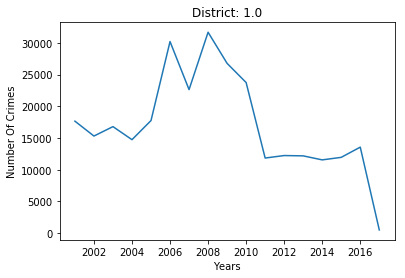

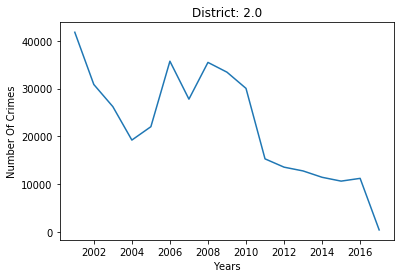

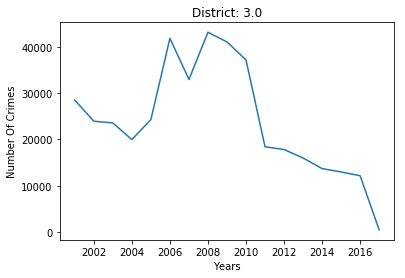

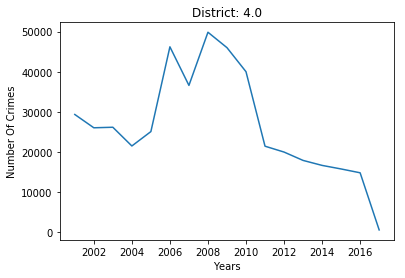

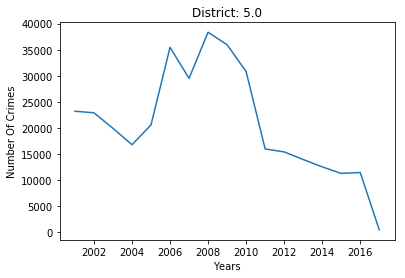

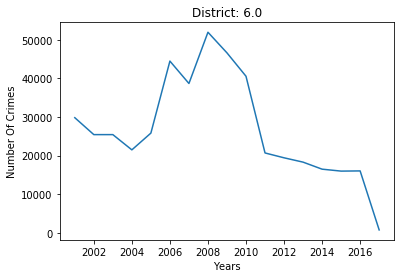

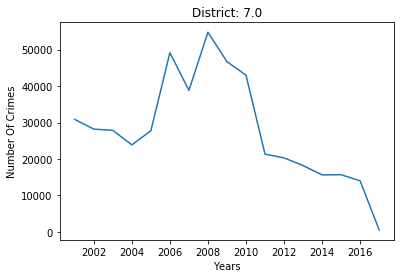

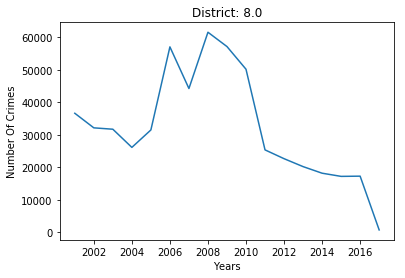

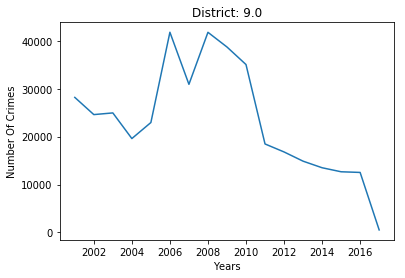

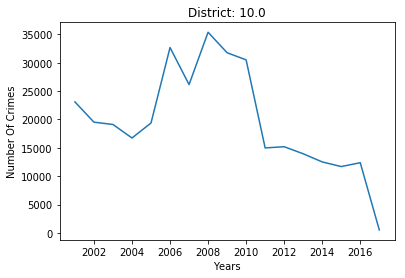

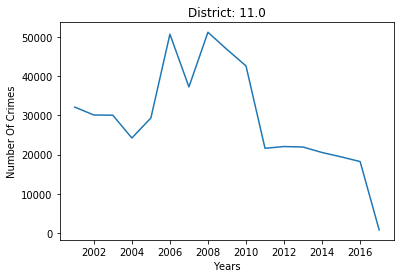

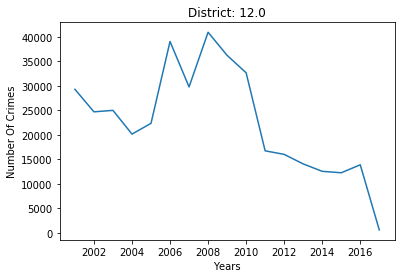

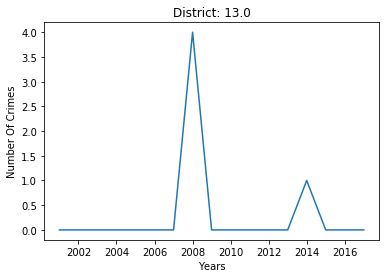

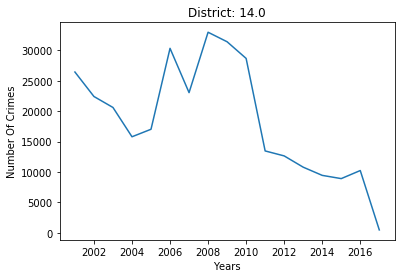

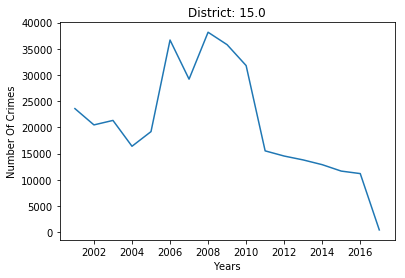

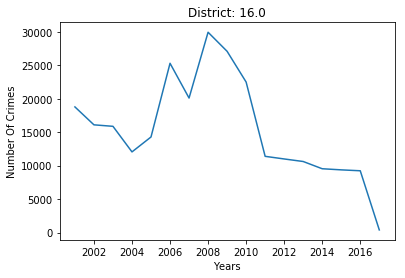

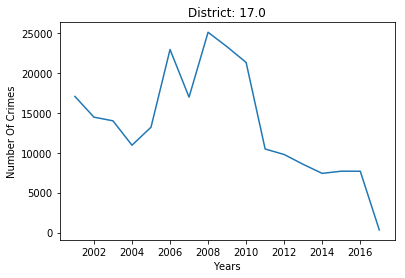

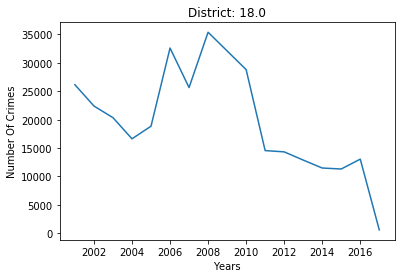

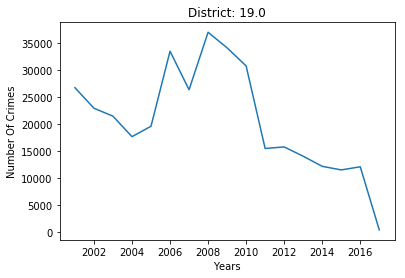

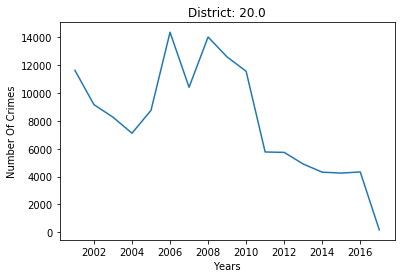

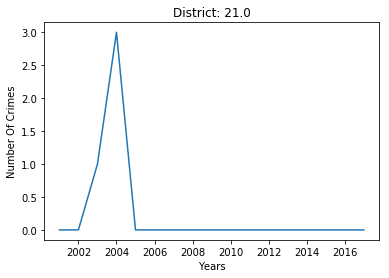

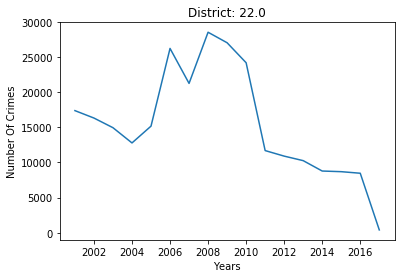

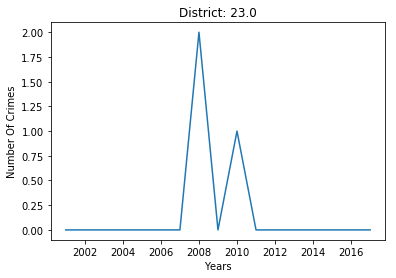

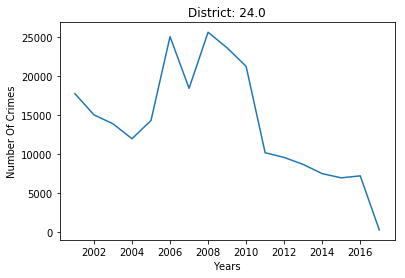

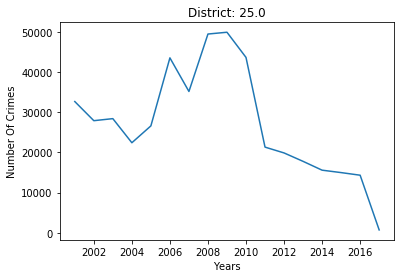

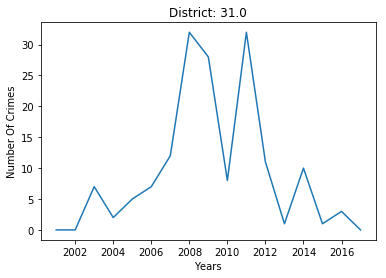

In [78]:
for district in districts: 
    listNumberCrimes = []
    for year in years:
        numberCrimes = len(dataset.loc[(dataset['Year'] == year) & (dataset['District'] == district)])
        listNumberCrimes.append(numberCrimes)
    plt.figure(district)
    plt.plot(years, listNumberCrimes)
    plt.ylabel('Number Of Crimes')
    plt.xlabel('Years')
    plt.title('District: '+str(district))

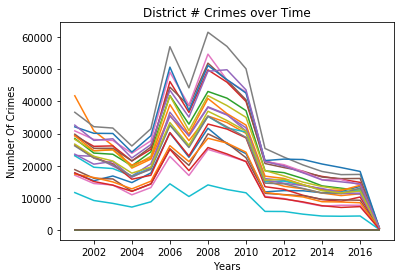

In [80]:
for district in districts: 
    listNumberCrimes = []
    for year in years:
        numberCrimes = len(dataset.loc[(dataset['Year'] == year) & (dataset['District'] == district)])
        listNumberCrimes.append(numberCrimes)
    plt.plot(years, listNumberCrimes)
    plt.ylabel('Number Of Crimes')
    plt.xlabel('Years')
    plt.title('District # Crimes over Time')

In [81]:
def changeToDateTime(df, columnName, timeFormat): 
    df[columnName] = pd.to_datetime(df[columnName], format = timeFormat)

In [82]:
changeToDateTime(dataset, 'Date', '%Y-%m-%d %H:%M:%S')

In [ ]:
#column for hours 
#column for months 

In [83]:
hours = dataset['Date'].apply(lambda x: x.hour)

In [84]:
months = dataset['Date'].apply(lambda x: x.month)

In [85]:
hoursDf = pd.DataFrame({'Hours': hours})

In [86]:
monthsDf = pd.DataFrame({'Months': months})

In [89]:
dataset = pd.concat([dataset, monthsDf, hoursDf], axis = 1)

In [94]:
dataset

,Unnamed: 0,ID,Date,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours
0,0,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,0,0,4.0,2004.0,41.734106,-87.563621,1,0
1,1,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,0,1,9.0,2003.0,41.817229,-87.637328,3,0
2,2,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,0,0,14.0,2004.0,41.915620,-87.694019,6,11
3,3,4789765,2004-12-30 20:00:00,THEFT,OTHER,0,0,25.0,2004.0,41.919054,-87.752178,12,20
4,4,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,0,0,22.0,2003.0,41.691785,-87.635116,5,1
5,5,4838048,2004-08-01 00:01:00,THEFT,APARTMENT,0,0,10.0,2004.0,41.853447,-87.712625,8,0
6,6,4791194,2001-01-01 11:00:00,CRIM SEXUAL ASSAULT,RESIDENCE,1,1,5.0,2001.0,41.687020,-87.608445,1,11
7,7,4679521,2003-03-15 00:00:00,OTHER OFFENSE,RESIDENCE PORCH/HALLWAY,0,0,22.0,2003.0,41.729712,-87.653159,3,0
8,8,4792195,2004-09-16 10:00:00,THEFT,RESIDENCE,0,0,18.0,2004.0,41.902862,-87.636098,9,10
9,9,4680124,2003-01-01 00:00:00,THEFT,RESIDENCE,0,0,11.0,2003.0,41.869772,-87.708180,1,0


In [93]:
dataset.to_csv("../../crimesInChicagoData/expandedTime.csv")

### Categorizing Location Description Data: 
* We are categorizing the Location Description Data into three main categories:
* RESIDENCE, STREET, and OTHER 
* This is to reduce the increasing # of dimensionalities
* It is also in part b/c upon analysis, we found that the top two crime numbers stemmed from RESIDENCE & STREET
* Manual grouping was needed to define RESIDENCE and STREET 
* The three categories roughly divided the data to thirds 

In [3]:
dataset = pd.read_csv("../../crimesInChicagoData/expandedTime.csv")

In [141]:
dataset

,Unnamed: 0,Unnamed: 0.1,ID,Date,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours
0,0,0,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,0,0,4.0,2004.0,41.734106,-87.563621,1,0
1,1,1,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,0,1,9.0,2003.0,41.817229,-87.637328,3,0
2,2,2,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,0,0,14.0,2004.0,41.915620,-87.694019,6,11
3,3,3,4789765,2004-12-30 20:00:00,THEFT,OTHER,0,0,25.0,2004.0,41.919054,-87.752178,12,20
4,4,4,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,0,0,22.0,2003.0,41.691785,-87.635116,5,1
5,5,5,4838048,2004-08-01 00:01:00,THEFT,APARTMENT,0,0,10.0,2004.0,41.853447,-87.712625,8,0
6,6,6,4791194,2001-01-01 11:00:00,CRIM SEXUAL ASSAULT,RESIDENCE,1,1,5.0,2001.0,41.687020,-87.608445,1,11
7,7,7,4679521,2003-03-15 00:00:00,OTHER OFFENSE,RESIDENCE PORCH/HALLWAY,0,0,22.0,2003.0,41.729712,-87.653159,3,0
8,8,8,4792195,2004-09-16 10:00:00,THEFT,RESIDENCE,0,0,18.0,2004.0,41.902862,-87.636098,9,10
9,9,9,4680124,2003-01-01 00:00:00,THEFT,RESIDENCE,0,0,11.0,2003.0,41.869772,-87.708180,1,0


In [4]:
locations = dataset['Location Description'].unique()

In [5]:
locationCrimes = []
for location in locations: 
    numberCrimes = len(dataset.loc[(dataset['Location Description'] == location)])
    print(location)
    print(numberCrimes)
    locationCrimes.append(numberCrimes)
    print("----------------------------------")

RESIDENCE
1341749
----------------------------------
OTHER
294286
----------------------------------
APARTMENT
812512
----------------------------------
RESIDENCE PORCH/HALLWAY
138492
----------------------------------
GAS STATION
82396
----------------------------------
COMMERCIAL / BUSINESS OFFICE
58200
----------------------------------
STREET
2101842
----------------------------------
BANK
32563
----------------------------------
SMALL RETAIL STORE
134003
----------------------------------
DEPARTMENT STORE
95201
----------------------------------
SIDEWALK
815595
----------------------------------
APPLIANCE STORE
2096
----------------------------------
HOTEL/MOTEL
31475
----------------------------------
MEDICAL/DENTAL OFFICE
8415
----------------------------------
PARKING LOT/GARAGE(NON.RESID.)
225454
----------------------------------
ALLEY
180155
----------------------------------
CHURCH/SYNAGOGUE/PLACE OF WORSHIP
17653
----------------------------------
DAY CARE CENTER
3031
----

2
----------------------------------
BANQUET HALL
1
----------------------------------
VEHICLE - DELIVERY TRUCK
45
----------------------------------
ROOMING HOUSE
1
----------------------------------
AIRCRAFT
527
----------------------------------
CTA BUS STOP
5844
----------------------------------
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA
528
----------------------------------
AIRPORT EXTERIOR - SECURE AREA
239
----------------------------------
AIRPORT EXTERIOR - NON-SECURE AREA
657
----------------------------------
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA
1401
----------------------------------
AIRPORT TERMINAL UPPER LEVEL - NON-SECURE AREA
558
----------------------------------
AIRPORT VENDING ESTABLISHMENT
719
----------------------------------
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA
626
----------------------------------
AIRPORT TRANSPORTATION SYSTEM (ATS)
82
----------------------------------
NURSING HOME
4
----------------------------------
CTA "L" PLATFORM
3


In [6]:
locationCrimesSorted = sorted(locationCrimes)

In [7]:
len(locationCrimesSorted)

173

In [8]:
locationCrimesSorted

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 3,
 3,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 5,
 5,
 5,
 5,
 6,
 6,
 6,
 6,
 7,
 9,
 10,
 10,
 12,
 12,
 12,
 13,
 14,
 15,
 15,
 16,
 17,
 18,
 34,
 38,
 40,
 42,
 43,
 45,
 46,
 48,
 52,
 70,
 73,
 76,
 82,
 87,
 109,
 160,
 178,
 189,
 239,
 261,
 271,
 395,
 404,
 411,
 423,
 471,
 507,
 527,
 528,
 532,
 558,
 580,
 587,
 626,
 657,
 719,
 746,
 784,
 827,
 878,
 984,
 1126,
 1180,
 1192,
 1192,
 1213,
 1220,
 1233,
 1401,
 1704,
 1988,
 1990,
 2096,
 2941,
 3031,
 3144,
 3256,
 3732,
 4720,
 5774,
 5787,
 5844,
 6161,
 6780,
 6809,
 7181,
 8177,
 8300,
 8415,
 8895,
 9127,
 9435,
 10895,
 12541,
 12778,
 13656,
 14841,
 15433,
 15743,
 15970,
 16365,
 17653,
 20242,
 21873,
 22801,
 23519,
 25158,
 25855,
 26721,
 28034,
 30135,
 31475,
 32563,
 34772,
 35671,
 41169,
 41550,
 44710,
 58200,
 61322,
 65123,
 75442,
 82396,
 95201,
 100812,
 116295,
 128311,
 134003,
 138492,
 158550,
 173750,


In [9]:
for district in dataset['District'].unique():
    print(district)
    print(len(dataset['District'].loc[dataset['District']==district]))

4.0
453894
9.0
397943
14.0
314646
25.0
463944
22.0
263058
10.0
335495
5.0
354569
18.0
337201
11.0
498783
20.0
137310
8.0
550015
7.0
476533
1.0
291082
16.0
263446
15.0
352589
3.0
407874
6.0
457671
2.0
378298
19.0
351541
12.0
386276
24.0
237985
17.0
230957
31.0
159
21.0
4
13.0
5
23.0
3


In [10]:
residenceList = ['RESIDENCE','RESIDENCE PORCH/HALLWAY','RESIDENCE-GARAGE','APARTMENT',       
                 'RESIDENTIAL YARD (FRONT/BACK)',  'DRIVEWAY - RESIDENTIAL',
                 'ROOMING HOUSE', 'HOUSE', 'DRIVEWAY', 'ROOMING HOUSE', 
'NURSING HOME/RETIREMENT HOME',  'PORCH', 'YARD']

In [11]:
streetsList = ['STREET', 'SIDEWALK', 'ALLEY']

In [12]:
residenceCount = 0; 
for residence in residenceList: 
    print(residence)
    numResidenceCrimes = len(dataset['Location Description'].loc[dataset['Location Description']==residence])
    print(numResidenceCrimes)
    residenceCount += numResidenceCrimes 
    print("================================")
print("Total Residence Crimes Count:")
print(residenceCount)

RESIDENCE
1341749
RESIDENCE PORCH/HALLWAY
138492
RESIDENCE-GARAGE
158550
APARTMENT
812512
RESIDENTIAL YARD (FRONT/BACK)
75442
DRIVEWAY - RESIDENTIAL
23519
ROOMING HOUSE
1
HOUSE
507
DRIVEWAY
13
ROOMING HOUSE
1
NURSING HOME/RETIREMENT HOME
14841
PORCH
271
YARD
178
Total Residence Crimes Count:
2566076


In [13]:
streetsCount = 0; 
for street in streetsList: 
    print(street)
    numStreetCrimes = len(dataset['Location Description'].loc[dataset['Location Description']==street])
    print(numStreetCrimes)
    streetsCount += numStreetCrimes 
    print("================================")
print("Total Street Crimes Count:")
print(streetsCount)

STREET
2101842
SIDEWALK
815595
ALLEY
180155
Total Street Crimes Count:
3097592


In [14]:
totalCount  = streetsCount + residenceCount

In [15]:
totalCount

5663668

In [16]:
len(dataset)  - totalCount

2277613

### Looking at Location Description RESIDENCE and STREET by years 

In [17]:
years =sorted(dataset['Year'].unique()) 

In [21]:
resCounts = []
for year in years: 
    resYearTotal = 0; 
    for residence in residenceList: 
        numResidenceCrimes = len(dataset['Location Description'].loc[(dataset['Location Description']==residence) & (dataset['Year'] == year)])
        resYearTotal += numResidenceCrimes 
    print("Total Residence Crimes Count in year " +str(year) + ": ")
    print(resYearTotal)
    resCounts.append(resYearTotal)
    print("================================")

Total Residence Crimes Count in year 2001.0: 
169538
Total Residence Crimes Count in year 2002.0: 
149686
Total Residence Crimes Count in year 2003.0: 
143762
Total Residence Crimes Count in year 2004.0: 
117372
Total Residence Crimes Count in year 2005.0: 
139386
Total Residence Crimes Count in year 2006.0: 
240502
Total Residence Crimes Count in year 2007.0: 
196319
Total Residence Crimes Count in year 2008.0: 
278846
Total Residence Crimes Count in year 2009.0: 
266827
Total Residence Crimes Count in year 2010.0: 
233791
Total Residence Crimes Count in year 2011.0: 
122626
Total Residence Crimes Count in year 2012.0: 
115742
Total Residence Crimes Count in year 2013.0: 
105593
Total Residence Crimes Count in year 2014.0: 
94362
Total Residence Crimes Count in year 2015.0: 
92049
Total Residence Crimes Count in year 2016.0: 
95399
Total Residence Crimes Count in year 2017.0: 
4276


Text(0.5,1,'# Residence Crimes over Years ')

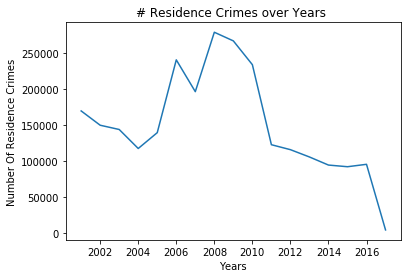

In [23]:
plt.figure(0)
plt.plot(years, resCounts)
plt.ylabel('Number Of Residence Crimes')
plt.xlabel('Years')
plt.title('# Residence Crimes over Years ')

In [24]:
streetCounts = []
for year in years: 
    streetYearTotal = 0; 
    for street in streetsList: 
        numStreetCrimes = len(dataset['Location Description'].loc[(dataset['Location Description']==street) & (dataset['Year'] == year)])
        streetYearTotal += numStreetCrimes 
    print("Total Street Crimes Count in year " +str(year) + ": ")
    print(streetYearTotal)
    streetCounts.append(streetYearTotal)
    print("================================")

Total Street Crimes Count in year 2001.0: 
220779
Total Street Crimes Count in year 2002.0: 
194797
Total Street Crimes Count in year 2003.0: 
194090
Total Street Crimes Count in year 2004.0: 
158315
Total Street Crimes Count in year 2005.0: 
180632
Total Street Crimes Count in year 2006.0: 
323103
Total Street Crimes Count in year 2007.0: 
251704
Total Street Crimes Count in year 2008.0: 
337014
Total Street Crimes Count in year 2009.0: 
302956
Total Street Crimes Count in year 2010.0: 
277802
Total Street Crimes Count in year 2011.0: 
133267
Total Street Crimes Count in year 2012.0: 
124831
Total Street Crimes Count in year 2013.0: 
111025
Total Street Crimes Count in year 2014.0: 
100023
Total Street Crimes Count in year 2015.0: 
94221
Total Street Crimes Count in year 2016.0: 
89422
Total Street Crimes Count in year 2017.0: 
3611


Text(0.5,1,'# Street Crimes over Years ')

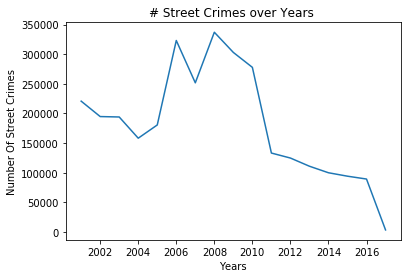

In [25]:
plt.figure(1)
plt.plot(years, streetCounts)
plt.ylabel('Number Of Street Crimes')
plt.xlabel('Years')
plt.title('# Street Crimes over Years ')

In [35]:
othersList = []
dataSize= len(dataset)
for i in range(len(years)):
    otherCount = len(dataset['Year'].loc[(dataset['Year'] == years[i])]) - (streetCounts[i]+ resCounts[i])
    othersList.append(otherCount)

Text(0.5,1,'# Other Crimes over Years ')

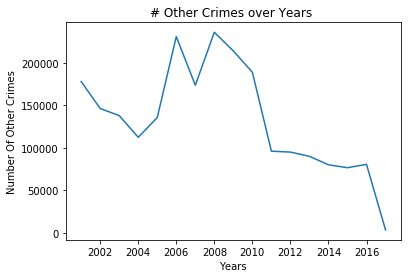

In [37]:
plt.figure(2)
plt.plot(years, othersList)
plt.ylabel('Number Of Other Crimes')
plt.xlabel('Years')
plt.title('# Other Crimes over Years ')

### Grouping Categories 

In [38]:
replaceResList = []
for i in range(len(residenceList)):
    replaceResList.append('RESIDENCE')

In [39]:
dataset['Location Description'] = dataset['Location Description'].replace(residenceList, replaceResList)

In [40]:
len(dataset['Location Description'].loc[dataset['Location Description']=='RESIDENCE'])

2566075

In [41]:
dataset['Location Description'] = dataset['Location Description'].replace(streetsList, ['STREET', 'STREET', 'STREET'])

In [42]:
len(dataset['Location Description'].loc[dataset['Location Description']=='STREET'])

3097592

In [43]:
uniqueLocations = list(dataset['Location Description'].unique())

In [45]:
uniqueLocations.remove('RESIDENCE')

In [46]:
uniqueLocations.remove('STREET')

In [48]:
replaceOthersList =[]
for i in range(len(uniqueLocations)):
    replaceOthersList.append('OTHER')

In [49]:
dataset['Location Description'] = dataset['Location Description'].replace(uniqueLocations, replaceOthersList)

In [50]:
len(dataset['Location Description'].loc[dataset['Location Description']=='OTHER'])

2277614

In [51]:
len(dataset)-3097592 -2566075

2277614

In [53]:
dataset['Location Description'].unique()

array(['RESIDENCE', 'OTHER', 'STREET'], dtype=object)

In [54]:
dataset

,Unnamed: 0,Unnamed: 0.1,ID,Date,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours
0,0,0,4786321,2004-01-01 00:01:00,THEFT,RESIDENCE,0,0,4.0,2004.0,41.734106,-87.563621,1,0
1,1,1,4676906,2003-03-01 00:00:00,OTHER OFFENSE,RESIDENCE,0,1,9.0,2003.0,41.817229,-87.637328,3,0
2,2,2,4789749,2004-06-20 11:00:00,OFFENSE INVOLVING CHILDREN,RESIDENCE,0,0,14.0,2004.0,41.915620,-87.694019,6,11
3,3,3,4789765,2004-12-30 20:00:00,THEFT,OTHER,0,0,25.0,2004.0,41.919054,-87.752178,12,20
4,4,4,4677901,2003-05-01 01:00:00,THEFT,RESIDENCE,0,0,22.0,2003.0,41.691785,-87.635116,5,1
5,5,5,4838048,2004-08-01 00:01:00,THEFT,RESIDENCE,0,0,10.0,2004.0,41.853447,-87.712625,8,0
6,6,6,4791194,2001-01-01 11:00:00,CRIM SEXUAL ASSAULT,RESIDENCE,1,1,5.0,2001.0,41.687020,-87.608445,1,11
7,7,7,4679521,2003-03-15 00:00:00,OTHER OFFENSE,RESIDENCE,0,0,22.0,2003.0,41.729712,-87.653159,3,0
8,8,8,4792195,2004-09-16 10:00:00,THEFT,RESIDENCE,0,0,18.0,2004.0,41.902862,-87.636098,9,10
9,9,9,4680124,2003-01-01 00:00:00,THEFT,RESIDENCE,0,0,11.0,2003.0,41.869772,-87.708180,1,0


In [57]:
dataset = dataset.drop(['Unnamed: 0', 'Unnamed: 0.1', 'Date'], axis = 1)

In [58]:
dataset.head()

,ID,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours
0,4786321,THEFT,RESIDENCE,0,0,4.0,2004.0,41.734106,-87.563621,1,0
1,4676906,OTHER OFFENSE,RESIDENCE,0,1,9.0,2003.0,41.817229,-87.637328,3,0
2,4789749,OFFENSE INVOLVING CHILDREN,RESIDENCE,0,0,14.0,2004.0,41.915620,-87.694019,6,11
3,4789765,THEFT,OTHER,0,0,25.0,2004.0,41.919054,-87.752178,12,20
4,4677901,THEFT,RESIDENCE,0,0,22.0,2003.0,41.691785,-87.635116,5,1


In [59]:
dataset.to_csv("../../crimesInChicagoData/groupedLocDescription.csv")

### Expanding Features as Columns and Assigning Binary Values:
#### Part 1: 'Location Description' Data
* Expand the three groups into three columns, RESIDENCE, OTHER, STREET
* Delete 'Location Description' Column because redundant 

In [4]:
dataset = pd.read_csv("../../crimesInChicagoData/groupedLocDescription.csv")

In [61]:
dataset

,Unnamed: 0,ID,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours
0,0,4786321,THEFT,RESIDENCE,0,0,4.0,2004.0,41.734106,-87.563621,1,0
1,1,4676906,OTHER OFFENSE,RESIDENCE,0,1,9.0,2003.0,41.817229,-87.637328,3,0
2,2,4789749,OFFENSE INVOLVING CHILDREN,RESIDENCE,0,0,14.0,2004.0,41.915620,-87.694019,6,11
3,3,4789765,THEFT,OTHER,0,0,25.0,2004.0,41.919054,-87.752178,12,20
4,4,4677901,THEFT,RESIDENCE,0,0,22.0,2003.0,41.691785,-87.635116,5,1
5,5,4838048,THEFT,RESIDENCE,0,0,10.0,2004.0,41.853447,-87.712625,8,0
6,6,4791194,CRIM SEXUAL ASSAULT,RESIDENCE,1,1,5.0,2001.0,41.687020,-87.608445,1,11
7,7,4679521,OTHER OFFENSE,RESIDENCE,0,0,22.0,2003.0,41.729712,-87.653159,3,0
8,8,4792195,THEFT,RESIDENCE,0,0,18.0,2004.0,41.902862,-87.636098,9,10
9,9,4680124,THEFT,RESIDENCE,0,0,11.0,2003.0,41.869772,-87.708180,1,0


In [11]:
def binaryExpansion(df, columnName, notString):
    datasetLength = len(df)
    initialList = [0]*datasetLength
    if(notString):
        for categoryName in df[columnName].unique():
            newColumnName = columnName +str(categoryName)
            df[newColumnName] = pd.DataFrame(initialList)
            df[newColumnName].loc[df[columnName]==categoryName] = 1
    else:
        for categoryName in df[columnName].unique():
            newColumnName = categoryName
            df[newColumnName] = pd.DataFrame(initialList)
            df[newColumnName].loc[df[columnName]==categoryName] = 1 

In [12]:
binaryExpansion(dataset, 'Location Description', False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
dataset

,Unnamed: 0,ID,Primary Type,Location Description,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours,RESIDENCE,OTHER,STREET
0,0,4786321,THEFT,RESIDENCE,0,0,4.0,2004.0,41.734106,-87.563621,1,0,1,0,0
1,1,4676906,OTHER OFFENSE,RESIDENCE,0,1,9.0,2003.0,41.817229,-87.637328,3,0,1,0,0
2,2,4789749,OFFENSE INVOLVING CHILDREN,RESIDENCE,0,0,14.0,2004.0,41.915620,-87.694019,6,11,1,0,0
3,3,4789765,THEFT,OTHER,0,0,25.0,2004.0,41.919054,-87.752178,12,20,0,1,0
4,4,4677901,THEFT,RESIDENCE,0,0,22.0,2003.0,41.691785,-87.635116,5,1,1,0,0
5,5,4838048,THEFT,RESIDENCE,0,0,10.0,2004.0,41.853447,-87.712625,8,0,1,0,0
6,6,4791194,CRIM SEXUAL ASSAULT,RESIDENCE,1,1,5.0,2001.0,41.687020,-87.608445,1,11,1,0,0
7,7,4679521,OTHER OFFENSE,RESIDENCE,0,0,22.0,2003.0,41.729712,-87.653159,3,0,1,0,0
8,8,4792195,THEFT,RESIDENCE,0,0,18.0,2004.0,41.902862,-87.636098,9,10,1,0,0
9,9,4680124,THEFT,RESIDENCE,0,0,11.0,2003.0,41.869772,-87.708180,1,0,1,0,0


In [17]:
dataset.to_csv("../../crimesInChicagoData/expandedLocDescription.csv")

In [18]:
dataset = dataset.drop(['Location Description'], axis = 1)

In [20]:
dataset = dataset.drop(['Unnamed: 0'], axis = 1)

In [21]:
dataset.head()

,ID,Primary Type,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours,RESIDENCE,OTHER,STREET
0,4786321,THEFT,0,0,4.0,2004.0,41.734106,-87.563621,1,0,1,0,0
1,4676906,OTHER OFFENSE,0,1,9.0,2003.0,41.817229,-87.637328,3,0,1,0,0
2,4789749,OFFENSE INVOLVING CHILDREN,0,0,14.0,2004.0,41.915620,-87.694019,6,11,1,0,0
3,4789765,THEFT,0,0,25.0,2004.0,41.919054,-87.752178,12,20,0,1,0
4,4677901,THEFT,0,0,22.0,2003.0,41.691785,-87.635116,5,1,1,0,0


#### Part II: Expanding Primary Type Data: 
* The type of crime seems to be important so we will expand the data
* This will create 33 new dimensions -- 3 Dimensions were grouped together into 1 because they were the same  --> NON-CRIMINAL 

In [24]:
crimeTypes = dataset['Primary Type'].unique()
crimeTypes

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)'], dtype=object)

In [23]:
len(dataset['Primary Type'].unique())

35

In [25]:
for crimeType in crimeTypes:
    print("There exists the following number of crimes for this " +crimeType + ": ")
    print(len(dataset['Primary Type'].loc[dataset['Primary Type'] == crimeType]))
    print("------------------------------------")

There exists the following number of crimes for this THEFT: 
1640506
------------------------------------
There exists the following number of crimes for this OTHER OFFENSE: 
491922
------------------------------------
There exists the following number of crimes for this OFFENSE INVOLVING CHILDREN: 
51441
------------------------------------
There exists the following number of crimes for this CRIM SEXUAL ASSAULT: 
29868
------------------------------------
There exists the following number of crimes for this MOTOR VEHICLE THEFT: 
370548
------------------------------------
There exists the following number of crimes for this SEX OFFENSE: 
28707
------------------------------------
There exists the following number of crimes for this DECEPTIVE PRACTICE: 
280931
------------------------------------
There exists the following number of crimes for this BATTERY: 
1442716
------------------------------------
There exists the following number of crimes for this BURGLARY: 
470958
------------

It is clear that Non-Criminal has three separate categories, in otherwords two unnecessary extra dimensions, so we will group NON-CRIMINAL as one category 

In [31]:
repeatList = ['NON - CRIMINAL', 'NON-CRIMINAL (SUBJECT SPECIFIED)' ]

In [32]:
dataset['Primary Type'] = dataset['Primary Type'].replace(repeatList, ['NON-CRIMINAL', 'NON-CRIMINAL'])

In [35]:
len(dataset['Primary Type'].unique())

33

In [33]:
dataset['Primary Type'].unique()

array(['THEFT', 'OTHER OFFENSE', 'OFFENSE INVOLVING CHILDREN',
       'CRIM SEXUAL ASSAULT', 'MOTOR VEHICLE THEFT', 'SEX OFFENSE',
       'DECEPTIVE PRACTICE', 'BATTERY', 'BURGLARY', 'WEAPONS VIOLATION',
       'PUBLIC PEACE VIOLATION', 'NARCOTICS', 'GAMBLING', 'PROSTITUTION',
       'LIQUOR LAW VIOLATION', 'INTERFERENCE WITH PUBLIC OFFICER',
       'CRIMINAL DAMAGE', 'ASSAULT', 'STALKING', 'ARSON',
       'CRIMINAL TRESPASS', 'HOMICIDE', 'ROBBERY', 'OBSCENITY',
       'KIDNAPPING', 'INTIMIDATION', 'RITUALISM', 'DOMESTIC VIOLENCE',
       'OTHER NARCOTIC VIOLATION', 'PUBLIC INDECENCY', 'NON-CRIMINAL',
       'HUMAN TRAFFICKING', 'CONCEALED CARRY LICENSE VIOLATION'], dtype=object)

In [36]:
dataset

,ID,Primary Type,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours,RESIDENCE,OTHER,STREET
0,4786321,THEFT,0,0,4.0,2004.0,41.734106,-87.563621,1,0,1,0,0
1,4676906,OTHER OFFENSE,0,1,9.0,2003.0,41.817229,-87.637328,3,0,1,0,0
2,4789749,OFFENSE INVOLVING CHILDREN,0,0,14.0,2004.0,41.915620,-87.694019,6,11,1,0,0
3,4789765,THEFT,0,0,25.0,2004.0,41.919054,-87.752178,12,20,0,1,0
4,4677901,THEFT,0,0,22.0,2003.0,41.691785,-87.635116,5,1,1,0,0
5,4838048,THEFT,0,0,10.0,2004.0,41.853447,-87.712625,8,0,1,0,0
6,4791194,CRIM SEXUAL ASSAULT,1,1,5.0,2001.0,41.687020,-87.608445,1,11,1,0,0
7,4679521,OTHER OFFENSE,0,0,22.0,2003.0,41.729712,-87.653159,3,0,1,0,0
8,4792195,THEFT,0,0,18.0,2004.0,41.902862,-87.636098,9,10,1,0,0
9,4680124,THEFT,0,0,11.0,2003.0,41.869772,-87.708180,1,0,1,0,0


In [37]:
binaryExpansion(dataset, 'Primary Type', False)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/pandas/core/indexing.py:179: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [38]:
pd.set_option('display.max_columns', None)

In [39]:
dataset.head()

,ID,Primary Type,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours,RESIDENCE,OTHER,STREET,THEFT,OTHER OFFENSE,OFFENSE INVOLVING CHILDREN,CRIM SEXUAL ASSAULT,MOTOR VEHICLE THEFT,SEX OFFENSE,DECEPTIVE PRACTICE,BATTERY,BURGLARY,WEAPONS VIOLATION,PUBLIC PEACE VIOLATION,NARCOTICS,GAMBLING,PROSTITUTION,LIQUOR LAW VIOLATION,INTERFERENCE WITH PUBLIC OFFICER,CRIMINAL DAMAGE,ASSAULT,STALKING,ARSON,CRIMINAL TRESPASS,HOMICIDE,ROBBERY,OBSCENITY,KIDNAPPING,INTIMIDATION,RITUALISM,DOMESTIC VIOLENCE,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,HUMAN TRAFFICKING,CONCEALED CARRY LICENSE VIOLATION
0,4786321,THEFT,0,0,4.0,2004.0,41.734106,-87.563621,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4676906,OTHER OFFENSE,0,1,9.0,2003.0,41.817229,-87.637328,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4789749,OFFENSE INVOLVING CHILDREN,0,0,14.0,2004.0,41.915620,-87.694019,6,11,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4789765,THEFT,0,0,25.0,2004.0,41.919054,-87.752178,12,20,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4677901,THEFT,0,0,22.0,2003.0,41.691785,-87.635116,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [40]:
dataset = dataset.drop(['Primary Type'], axis = 1)

In [41]:
dataset.head()

,ID,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours,RESIDENCE,OTHER,STREET,THEFT,OTHER OFFENSE,OFFENSE INVOLVING CHILDREN,CRIM SEXUAL ASSAULT,MOTOR VEHICLE THEFT,SEX OFFENSE,DECEPTIVE PRACTICE,BATTERY,BURGLARY,WEAPONS VIOLATION,PUBLIC PEACE VIOLATION,NARCOTICS,GAMBLING,PROSTITUTION,LIQUOR LAW VIOLATION,INTERFERENCE WITH PUBLIC OFFICER,CRIMINAL DAMAGE,ASSAULT,STALKING,ARSON,CRIMINAL TRESPASS,HOMICIDE,ROBBERY,OBSCENITY,KIDNAPPING,INTIMIDATION,RITUALISM,DOMESTIC VIOLENCE,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,HUMAN TRAFFICKING,CONCEALED CARRY LICENSE VIOLATION
0,4786321,0,0,4.0,2004.0,41.734106,-87.563621,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4676906,0,1,9.0,2003.0,41.817229,-87.637328,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4789749,0,0,14.0,2004.0,41.915620,-87.694019,6,11,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4789765,0,0,25.0,2004.0,41.919054,-87.752178,12,20,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4677901,0,0,22.0,2003.0,41.691785,-87.635116,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
dataset.to_csv("../../crimesInChicagoData/expandedPrimaryType.csv")

### Binary Expansion Completed 
* District, Months, Hours, and Year could also have a binary expansion, but our goal is to subset the dataset first by date/time/hour and then binaryExpansion() it if necessary because our data is too big 

In [43]:
dataset = pd.read_csv("../../crimesInChicagoData/expandedPrimaryType.csv")

In [44]:
dataset

,Unnamed: 0,ID,Arrest,Domestic,District,Year,Latitude,Longitude,Months,Hours,RESIDENCE,OTHER,STREET,THEFT,OTHER OFFENSE,OFFENSE INVOLVING CHILDREN,CRIM SEXUAL ASSAULT,MOTOR VEHICLE THEFT,SEX OFFENSE,DECEPTIVE PRACTICE,BATTERY,BURGLARY,WEAPONS VIOLATION,PUBLIC PEACE VIOLATION,NARCOTICS,GAMBLING,PROSTITUTION,LIQUOR LAW VIOLATION,INTERFERENCE WITH PUBLIC OFFICER,CRIMINAL DAMAGE,ASSAULT,STALKING,ARSON,CRIMINAL TRESPASS,HOMICIDE,ROBBERY,OBSCENITY,KIDNAPPING,INTIMIDATION,RITUALISM,DOMESTIC VIOLENCE,OTHER NARCOTIC VIOLATION,PUBLIC INDECENCY,NON-CRIMINAL,HUMAN TRAFFICKING,CONCEALED CARRY LICENSE VIOLATION
0,0,4786321,0,0,4.0,2004.0,41.734106,-87.563621,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,4676906,0,1,9.0,2003.0,41.817229,-87.637328,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,4789749,0,0,14.0,2004.0,41.915620,-87.694019,6,11,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,4789765,0,0,25.0,2004.0,41.919054,-87.752178,12,20,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,4677901,0,0,22.0,2003.0,41.691785,-87.635116,5,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,5,4838048,0,0,10.0,2004.0,41.853447,-87.712625,8,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,6,4791194,1,1,5.0,2001.0,41.687020,-87.608445,1,11,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,7,4679521,0,0,22.0,2003.0,41.729712,-87.653159,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,8,4792195,0,0,18.0,2004.0,41.902862,-87.636098,9,10,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,9,4680124,0,0,11.0,2003.0,41.869772,-87.708180,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
